In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import keras

Found 160 files belonging to 2 classes.


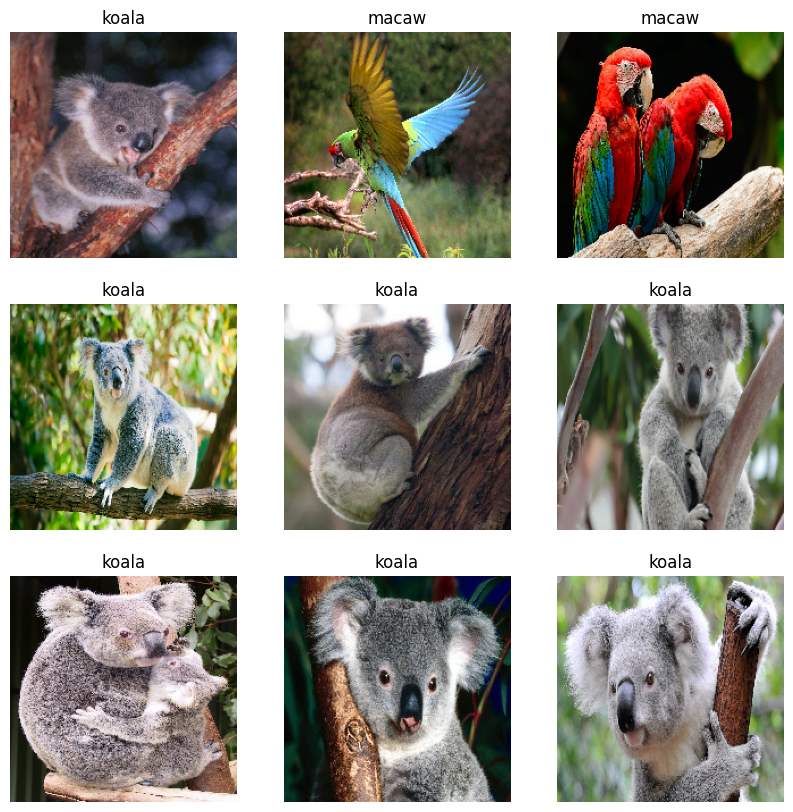

In [ ]:
# FOR PLOTTING TRAIN DATASET

image_directory = "drive/MyDrive/koala_vs_macaw/train/"
batch_size = 32
image_size = (200, 200)

dataset = keras.preprocessing.image_dataset_from_directory(
    image_directory,
    image_size=image_size,
    shuffle=True)

class_names = dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):  # take one batch of data
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
#FOR PLOTTING GRAPHS

def summarize_diagnostics(history):

  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy / Training Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # plot accuracy
  plt.subplot(212)
  plt.title('Classification / Training Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.tight_layout()


In [ ]:
# FOR CONFUSION MATRIX

def predict_test_classes(model):
    datagen = ImageDataGenerator(rescale = 1.0/255.0)
    test_it = datagen.flow_from_directory('drive/MyDrive/koala_vs_macaw/test', class_mode = 'binary', batch_size = 8, target_size = (200, 200), shuffle = False)
    y_pred_classes = np.argmax(model.predict(test_generator), axis=1)
    #print(y_pred_classes)

    # Get actual classes
    y_true = test_generator.classes


    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes))


In [ ]:
#define cnn model
def vgg1():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (200, 200, 3))) # 32 is no of layers in this block
    model.add(MaxPooling2D(2, 2)) # size of filter
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate = 0.001)
    model.compile(optimizer = opt, loss='binary_crossentropy', metrics = ['accuracy'])
    return model


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
20/20 [==============================] - 11s 530ms/step - loss: 0.7918 - accuracy: 0.5312 - val_loss: 0.7088 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 11s 517ms/step - loss: 0.6660 - accuracy: 0.6500 - val_loss: 0.6812 - val_accuracy: 0.5250
Epoch 3/20
20/20 [==============================] - 11s 549ms/step - loss: 0.6103 - accuracy: 0.6938 - val_loss: 0.6463 - val_accuracy: 0.6000
Epoch 4/20
20/20 [==============================] - 10s 487ms/step - loss: 0.5960 - accuracy: 0.7063 - val_loss: 0.6429 - val_accuracy: 0.6000
Epoch 5/20
20/20 [==============================] - 10s 484ms/step - loss: 0.5580 - accuracy: 0.7375 - val_loss: 0.5881 - val_accuracy: 0.7000
Epoch 6/20
20/20 [==============================] - 10s 515ms/step - loss: 0.4593 - accuracy: 0.7812 - val_loss: 0.7901 - val_accuracy: 0.5250
Epoch 7/20
20/20 [==============================] - 10s 511ms

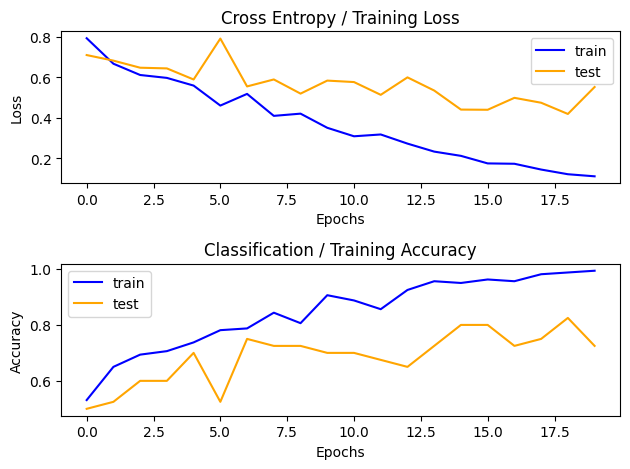

In [ ]:
model = vgg1()

datagen = ImageDataGenerator(rescale = 1.0/255.0)
train_it = datagen.flow_from_directory('drive/MyDrive/koala_vs_macaw/train', class_mode = 'binary', batch_size = 8, target_size = (200, 200))
test_it = datagen.flow_from_directory('drive/MyDrive/koala_vs_macaw/test', class_mode = 'binary', batch_size = 8, target_size = (200, 200), shuffle = False)

history = model.fit(train_it, validation_data = test_it, epochs = 20)

loss, acc = model.evaluate(test_it, steps = len(test_it))

print('> Testing Accuracy: %.3f' % (acc * 100.0))
print(model.summary(show_trainable = True))

summarize_diagnostics(history)


In [ ]:
predict_test_classes(model)